In [1]:
pip install numpy opencv-python matplotlib deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 13.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for deap: filename=deap-1.4.1-cp310-cp310-macosx_11_0_arm64.whl size=103903 sha256=f05d52cc02b2d5e944d77915f7dc85a1c1df2aa0ca9241c64231517a35ef10eb
  Stored in directory: /Users/keerthi/Library/Caches/pip/wheels/bb/f4/3b/f58bef4283b07c855978d752cdfd5808e1392224e6d0d7a6c6
Successfully built deap
Note: you may need to restart the kernel to use updated packages.


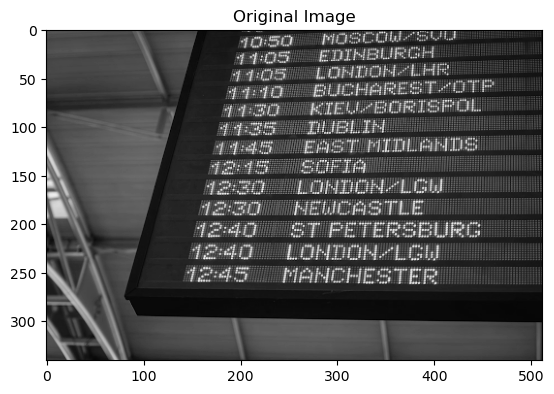

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'timetable.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()


In [12]:
import random
from deap import base, creator, tools, algorithms

# Define the fitness function
def fitness(individual, image):
    # Dummy fitness function (needs to be defined based on encryption quality)
    return random.random(),

# Set up the GA framework
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, 0, 255)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=len(image.flatten()))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness, image=image)

# Genetic Algorithm Parameters
population_size = 50
num_generations = 10
crossover_prob = 0.7
mutation_prob = 0.2

# Create the population
population = toolbox.population(n=population_size)

# Apply the genetic algorithm
result = algorithms.eaSimple(population, toolbox, cxpb=crossover_prob, mutpb=mutation_prob, ngen=num_generations, 
                             stats=None, halloffame=None, verbose=True)

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
print('Best Individual:', best_individual)


gen	nevals
0  	50    
1  	33    
2  	34    
3  	40    
4  	37    
5  	42    
6  	37    
7  	37    
8  	31    
9  	41    
10 	29    
Best Individual: [0, 126, 17, 52, 200, 209, 50, 143, 215, 115, 112, 0, 253, 3, 31, 132, 94, 32, 76, 227, 219, 65, 35, 125, 53, 184, 73, 17, 45, 252, 200, 26, 105, 218, 63, 45, 82, 145, 165, 62, 238, 25, 80, 113, 86, 192, 248, 170, 245, 115, 78, 66, 52, 122, 144, 27, 113, 171, 156, 107, 110, 108, 106, 181, 181, 182, 199, 139, 58, 24, 113, 202, 101, 113, 6, 140, 236, 86, 255, 0, 41, 79, 216, 23, 198, 2, 63, 238, 218, 239, 191, 229, 214, 0, 225, 105, 184, 184, 19, 225, 113, 4, 195, 213, 191, 75, 142, 0, 138, 120, 33, 213, 18, 0, 79, 206, 135, 195, 136, 155, 87, 223, 89, 175, 0, 124, 21, 162, 209, 0, 56, 242, 224, 149, 137, 161, 116, 99, 115, 230, 174, 141, 195, 242, 28, 71, 83, 55, 44, 248, 175, 152, 141, 169, 0, 15, 31, 242, 139, 144, 122, 11, 107, 126, 56, 32, 142, 0, 180, 23, 112, 173, 180, 8, 67, 95, 59, 214, 13, 97, 187, 127, 238, 91, 148, 28, 177, 252, 

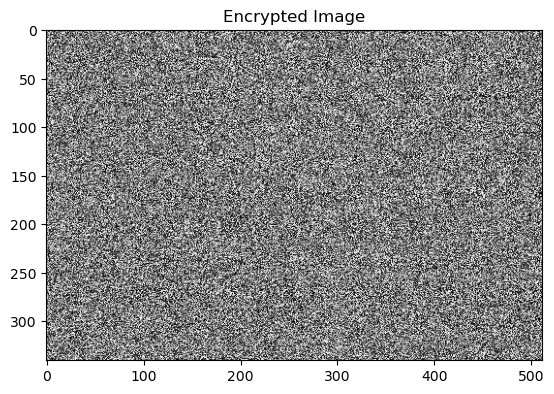

In [13]:
def encrypt_image(image, key):
    flat_image = image.flatten()
    encrypted_flat_image = flat_image.copy()
    for i in range(len(flat_image)):
        encrypted_flat_image[i] = flat_image[i] ^ key[i % len(key)]
    encrypted_image = encrypted_flat_image.reshape(image.shape)
    return encrypted_image

encrypted_image = encrypt_image(image, best_individual)

# Display the encrypted image
plt.imshow(encrypted_image, cmap='gray')
plt.title('Encrypted Image')
plt.show()


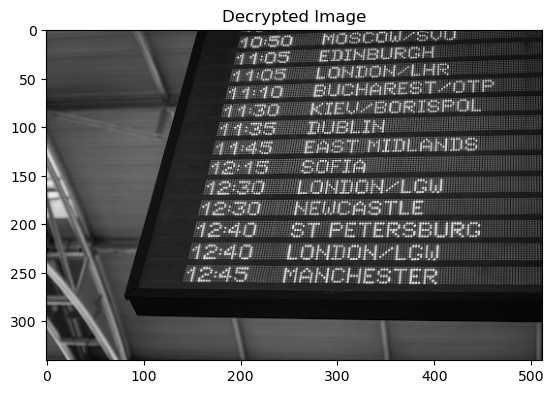

In [14]:
def decrypt_image(encrypted_image, key):
    return encrypt_image(encrypted_image, key)  # XOR operation is reversible

decrypted_image = decrypt_image(encrypted_image, best_individual)

# Display the decrypted image
plt.imshow(decrypted_image, cmap='gray')
plt.title('Decrypted Image')
plt.show()

In [15]:
import random
from deap import base, creator, tools, algorithms

# Define the fitness function
def fitness(individual, text):
    # Dummy fitness function (needs to be defined based on encryption quality)
    return random.random(),

# Set up the GA framework
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, 0, 255)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=256)  # Example key length
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", fitness, text='Your text here')

# Genetic Algorithm Parameters
population_size = 50
num_generations = 10
crossover_prob = 0.7
mutation_prob = 0.2

# Create the population
population = toolbox.population(n=population_size)

# Apply the genetic algorithm
result = algorithms.eaSimple(population, toolbox, cxpb=crossover_prob, mutpb=mutation_prob, ngen=num_generations, 
                             stats=None, halloffame=None, verbose=True)

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
print('Best Individual:', best_individual)

# Encrypt and decrypt functions
def encrypt_text(text, key):
    encrypted_text = ''.join(chr(ord(char) ^ key[i % len(key)]) for i, char in enumerate(text))
    return encrypted_text

def decrypt_text(encrypted_text, key):
    return encrypt_text(encrypted_text, key)  # XOR operation is reversible

# Encrypt and decrypt the text
text = "Hello, this is a test text."
encrypted_text = encrypt_text(text, best_individual)
decrypted_text = decrypt_text(encrypted_text, best_individual)

print('Encrypted Text:', encrypted_text)
print('Decrypted Text:', decrypted_text)

gen	nevals
0  	50    
1  	37    
2  	39    
3  	41    
4  	47    
5  	33    
6  	44    
7  	38    
8  	45    
9  	34    
10 	33    
Best Individual: [185, 14, 14, 90, 102, 11, 39, 177, 0, 132, 0, 30, 0, 227, 77, 136, 153, 197, 181, 59, 1, 207, 174, 191, 85, 245, 160, 164, 140, 135, 57, 246, 116, 28, 229, 8, 130, 163, 175, 79, 179, 147, 230, 161, 0, 87, 23, 90, 223, 114, 0, 175, 10, 175, 17, 43, 95, 47, 75, 81, 35, 235, 116, 31, 133, 243, 69, 0, 252, 102, 199, 18, 199, 137, 150, 197, 96, 60, 100, 170, 167, 182, 143, 37, 63, 173, 0, 107, 149, 243, 252, 190, 76, 115, 16, 171, 244, 124, 0, 0, 3, 0, 0, 89, 39, 191, 142, 75, 145, 0, 0, 204, 52, 226, 190, 219, 0, 166, 0, 101, 24, 0, 148, 172, 137, 31, 92, 189, 33, 30, 183, 255, 57, 59, 119, 159, 196, 132, 49, 55, 158, 83, 14, 210, 86, 14, 42, 204, 197, 132, 180, 221, 237, 160, 43, 85, 136, 161, 55, 14, 189, 18, 233, 28, 147, 108, 137, 45, 252, 211, 169, 70, 20, 0, 241, 68, 142, 193, 243, 181, 201, 38, 28, 244, 4, 40, 72, 1, 214, 179, 226, 247

/Users/keerthi/anaconda3/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/keerthi/anaconda3/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
